<a href="https://colab.research.google.com/github/serrve1/kdigital/blob/main/%EA%B2%BD%EA%B8%B0%EB%B6%84%EC%84%9D%EC%A0%84_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81%EA%B3%BC_%ED%94%BC%EC%B3%90%EC%85%80%EB%A0%89%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

경기지표를 보고 경기국면을 분석한다는 말은
경기 국면에 따라 자산군의 움직임에 영향을 주기 때문임.
- 국면이 자주바뀐다거나 이상하게 나오면
- 데이터를 잘못 다뤘을 가능성이 크다./ 이건 나중에 결과를 보고 판단하면 됨.
-  SAA 전략을 세울 때 자주 리벨런싱하지 않고
자산군의 형태를 잘 파악할 수 있도록 하기

- 안되면 회귀분석을 통해 유의한 피쳐만 골라내고
  경기적 패턴을 분석(경기성장 배제, 경기순환 (잡기힘듬) ==> 알려진 시클리컬 지표들만을 이용하여 경기변동분석)


#### 어떠한 데이터 프레임이 들어오면 => 시각화 형태를 보고 => 적절한 스케일링
#### 트레인 테스트 셋을 나눈 후 =>   피쳐 셀렉션하기 / 여러 방법을 통해서





#### 스케일링

1. min-max : 0~1까지인데 이건 시간적으로 상승하는데이터는
좋지 않아보임

2. StandardScaler : 정규화 이게 그나마 나은데
정규분포가 있다는 가정하에 쓰는 것이므로 정규성을 먼저 확인하는게 맞을 것 같은데 확인해볼 것

3.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 한글폰트
# 나눔고딕 폰트 설치
!apt-get -qq -y install fonts-nanum > /dev/null
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 한글 폰트 설정
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name)

# 런타임 다시 시작 (이 작업은 Colab에서 한 번만 수행하면 됨)
# Runtime -> Restart runtime 선택하거나 Ctrl+M . 입력 후 선택




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import warnings

# 경고 메시지를 출력하지 않도록 설정
warnings.filterwarnings("ignore")

# 경고 메시지를 발생시키는 함수
def example_function():
    warnings.warn("이 함수는 예제일 뿐입니다.", UserWarning)

# 함수 호출
example_function()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터 스케일링
데이터 스케일링(Data Scaling)이란 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 의미합니다. 값을 조정하는 과정이기 때문에 수치형 변수에만 적용해야 합니다.

사이킷런에서는 스케일링을 수행하기 위한 다양한 스케일러를 제공하는데요.
이때 모든 스케일러는 공통적으로 다음과 같은 메서드를 이용합니다.

fit(): 데이터 변환을 위한 기존 정보 설정 (ex: 데이터 세트의 최댓값/최솟값)
transform(): fit()을 통해 설정된 정보를 이용해 실제로 데이터를 변환
그리고 fit_transform()은 위 두 가지 메서드를 한 번에 적용하는 기능을 수행합니다.


우선, 스케일링의 대표적인 방법인 표준화(Standardization)와 정규화(Normalization)를 살펴보겠습니다.

In [4]:
# 기본패키지 설치
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans # 케이민즈 알고리즘
from sklearn.preprocessing import StandardScaler# 스텐다드 스케일러
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc

In [5]:
# 데이터프레임 불러오기
economics = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/resampled_data_final.csv',encoding="euc-kr")
economics['DATE'] = pd.to_datetime(economics['DATE'])
economics['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 289 entries, 0 to 288
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
287 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


In [6]:
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매
287,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
economics = economics.iloc[:287 , ] # 결측치 제거
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매


In [8]:
economics = economics.iloc[:240] # 2019년까지만

In [9]:
# 주택가격지수. 제조업신규주문 , 경기동행종합지수는 차분하고 (변동치로 변경한다는 뜻)
# 제조업 신규주문은 앞으로 어떻게 처리할지 일단 보류
#M2와 소매판매는 변화율로 바꾸는 전처리 시행
economics.주택가격지수 = economics.주택가격지수.diff().fillna(method= 'bfill')
economics.경기동행종합 = economics.경기동행종합.diff().fillna(method= 'bfill')
economics['M2차분'] = economics.M2통화량.diff().fillna(method= 'bfill')
economics['M2변화율'] = economics.M2차분/ (economics.M2통화량.shift(1)) * 100
#economics['M2변화율'] .fillna(method = 'ffill')
economics['소매판매차분'] = economics.소매판매.diff().fillna(method='bfill')
economics['소매판매변화율'] = economics.소매판매차분/ (economics.소매판매.shift(1)) * 100


# 차분, 변화율 확인
economics[['M2통화량','M2차분','M2변화율','소매판매','소매판매차분','소매판매변화율']].head(10)
# 결측치를 다음날 데이터로 채워주기
economics['M2변화율'] = economics['M2변화율'].fillna(method = 'bfill')
economics['소매판매변화율'] = economics['소매판매변화율'].fillna(method = 'bfill')
# M2, 소매판매 원데이터를 지웠습니다.
economics.drop(['M2통화량','M2차분','소매판매','소매판매차분'],axis = 1,inplace = True)

In [10]:
economics = economics.set_index('DATE')

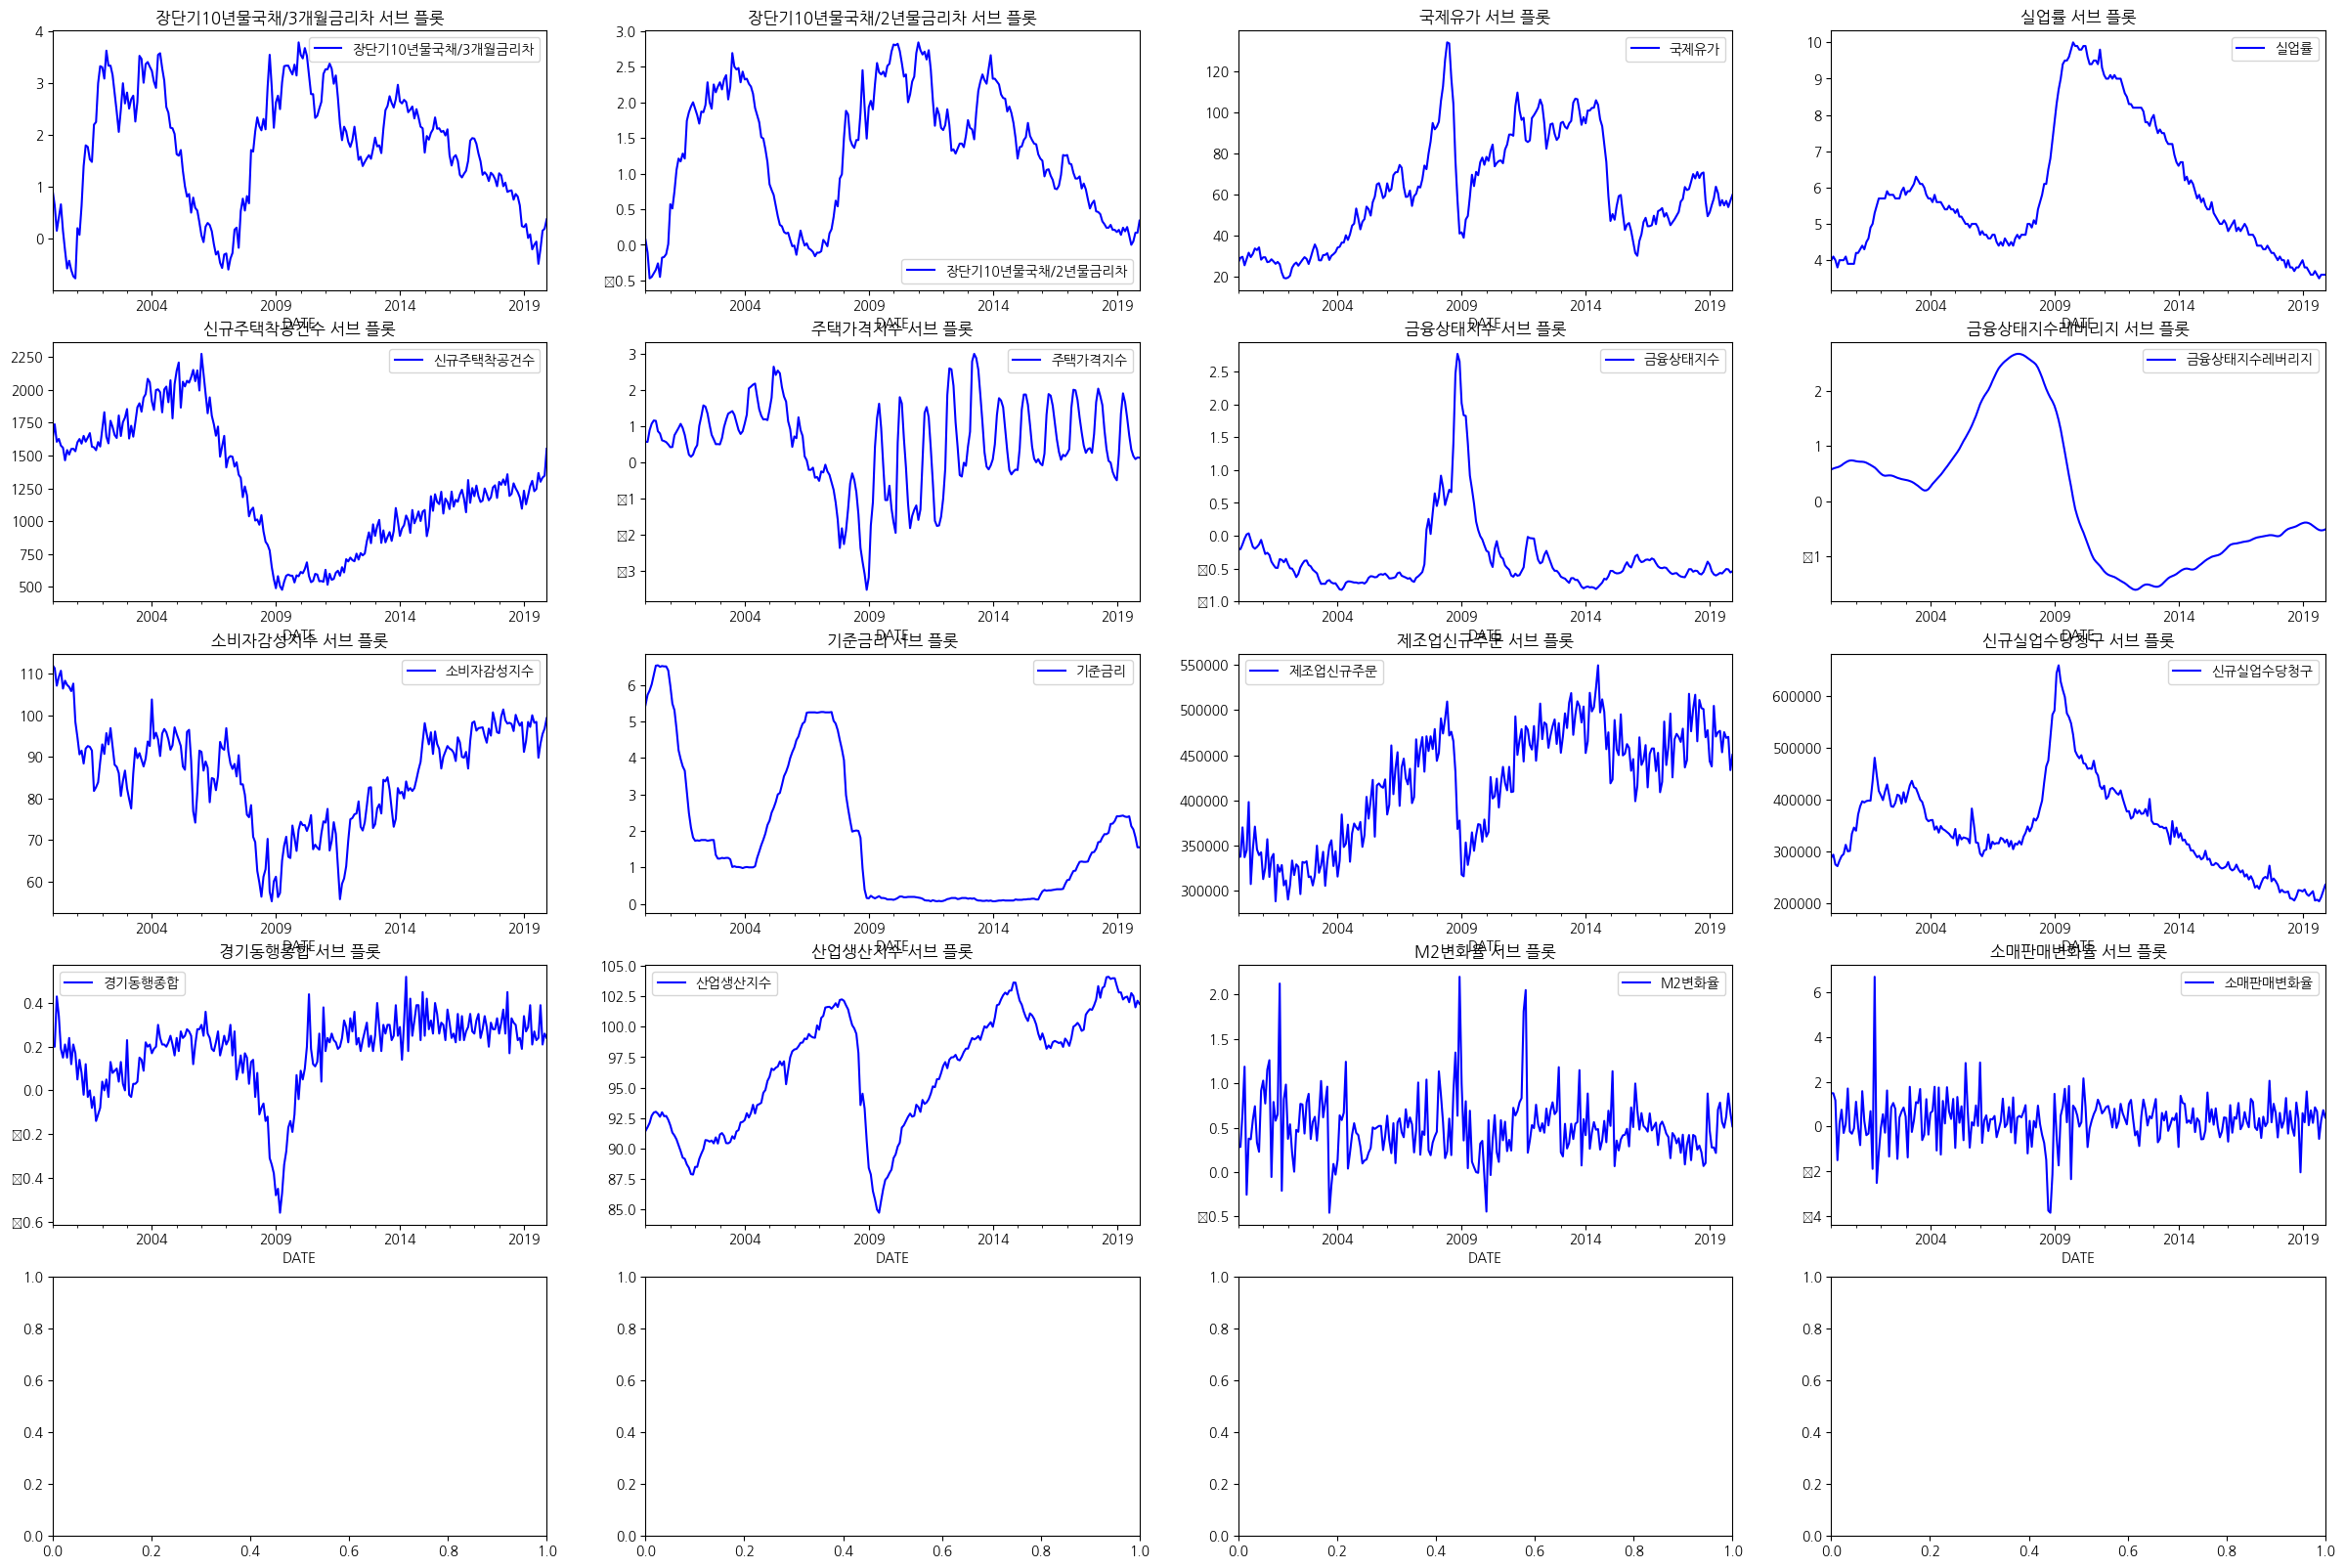

In [11]:
# 그래프 크기 조정
plt.rc('font', family='NanumGothic')
가로, 세로 = 30, 20  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성
# 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(economics.columns):
    economics.plot(y= col, kind='line', ax=axs[i//4, i%4], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()

표준화(Standardization)는 변수 각각의 평균을 0, 분산을 1로 만들어주는 스케일링 기법입니다. 표준화가 적용된 변수는 가우시안 정규분포를 가진 값으로 변환됩니다.

아래 수식과 같이, 변수 x의 원래 값에서 x의 평균을 뺀 값을 x의 표준편차로 나눈 값으로 계산할 수 있습니다.


In [12]:
# scikit-learn 패키지의 StandardScaler 클래스를 불러옵니다.
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체를 생성합니다.
standard_scaler = StandardScaler()
# fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
scaled_eocs = standard_scaler.fit_transform(economics)
# 표준화가 완료된 데이터를 데이터프레임 형태로 변환합니다.
scaled_eocs = pd.DataFrame(scaled_eocs,
                              index=economics.index,
                              columns=economics.columns)
# 표준화가 잘 되었는지 데이터를 확인해봅시다.
scaled_eocs.head()

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,신규실업수당청구,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,,,,,
2000-01-31,-0.703269,-1.358922,-1.322363,-1.041818,0.794549,0.084752,0.270843,0.389117,2.143427,1.916132,-1.291321,-0.650815,0.123418,-1.022683,-0.603253,1.181786
2000-02-29,-0.942971,-1.556543,-1.241600,-0.986439,1.011004,0.084752,0.251169,0.401823,2.086199,2.062488,-1.291321,-0.590551,0.123418,-0.959506,-0.603253,1.181786
2000-03-31,-1.362450,-1.951786,-1.223355,-1.041818,0.725970,0.356788,0.383517,0.412146,1.742831,2.125212,-0.777792,-0.804573,1.456621,-0.886769,0.447297,0.867074
2000-04-30,-1.139870,-1.929828,-1.381277,-1.152576,0.773118,0.507079,0.537326,0.420087,1.914515,2.214071,-1.300849,-0.840055,0.934933,-0.766660,1.926844,-1.784234
2000-05-31,-0.925850,-1.874933,-1.263755,-1.041818,0.663820,0.580965,0.653577,0.431204,2.037146,2.344746,-1.178957,-0.720091,0.065453,-0.715037,-2.111568,-0.162329


In [13]:
# 일단 MIN-MAX로 진행하기로 하였기 때문에 주석처리하였음

# # scikit-learn 패키지의 StandardScaler 클래스를 불러옵니다.
# from sklearn.preprocessing import StandardScaler
# # StandardScaler 객체를 생성합니다.
# standard_scaler = StandardScaler()
# # fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
# scaled_eocs = standard_scaler.fit_transform(economics)
# # 표준화가 완료된 데이터를 데이터프레임 형태로 변환합니다.
# scaled_eocs = pd.DataFrame(scaled_eocs,
#                               index=economics.index,
#                               columns=economics.columns)
# # 표준화가 잘 되었는지 데이터를 확인해봅시다.
# scaled_eocs.head()

In [14]:
# 민멕스 스케일링

from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(economics)

# 데이터 변환
mMscaled_data = mMscaler.transform(economics)

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(economics)

In [15]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters =4, init = 'k-means++', max_iter= 300, random_state= 0) # 군집을 4개로
# kmeans.fit(mMscaled_data)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px


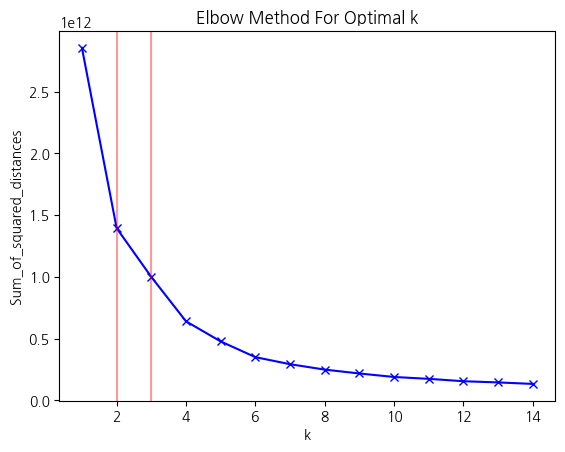

In [17]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(mMscaled_data) # 데이터프레임 입력
    sum_of_squared_distances.append(km.inertia_)

# 시각화

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

In [18]:
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(mMscaled_data)#데이터프레임
  clusters = kmeans.predict(mMscaled_data)#데이터프레임입력

  score = silhouette_score(mMscaled_data, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.45935225369575305
k : 3 score : 0.44681760962304373
k : 4 score : 0.444551958797451
k : 5 score : 0.4524072826582406
k : 6 score : 0.4656555165233536
k : 7 score : 0.43522839984225287
k : 8 score : 0.4164999001731976
k : 9 score : 0.40751447555126397
k : 10 score : 0.414486782271102
k : 11 score : 0.41587676945645125
k : 12 score : 0.4135931600703498
k : 13 score : 0.40841317975169533
best n : 6 best score : 0.4656555165233536


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np

# KMeans
kmeans = KMeans(n_clusters=6, init="k-means++", max_iter=300, random_state=200)
kmeans.fit(mMscaled_data)

# 데이터 프레임에 cluster 추가
mMscaled_data["cluster"] = kmeans.labels_

# 개별 데이터 실루엣 계수
score_samples = silhouette_samples(mMscaled_data, mMscaled_data.cluster)
print(f'silhouette_samples( ) return 값의 shape: {score_samples.shape}')

# 데이터 프레임에 실루엣 계수 추가
mMscaled_data['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수
average_score = silhouette_score(mMscaled_data, mMscaled_data.cluster)
print(f'경제데이터 Silhouette Analysis Score: {average_score:.3f}')


silhouette_samples( ) return 값의 shape: (240,)
경제데이터 Silhouette Analysis Score: 0.466


In [20]:
mMscaled_data.groupby("cluster").mean()[["silhouette_coeff"]]

,silhouette_coeff
cluster,
0,0.52
1,0.62
2,0.44
3,0.40
4,0.41
5,0.40


In [21]:
def visualize_silhouette_sklearn(range_n_clusters, X):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title('Number of Cluster : '+ str(n_clusters)+'\n' \
                              'Silhouette Score :' + str(round(silhouette_avg,3)))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

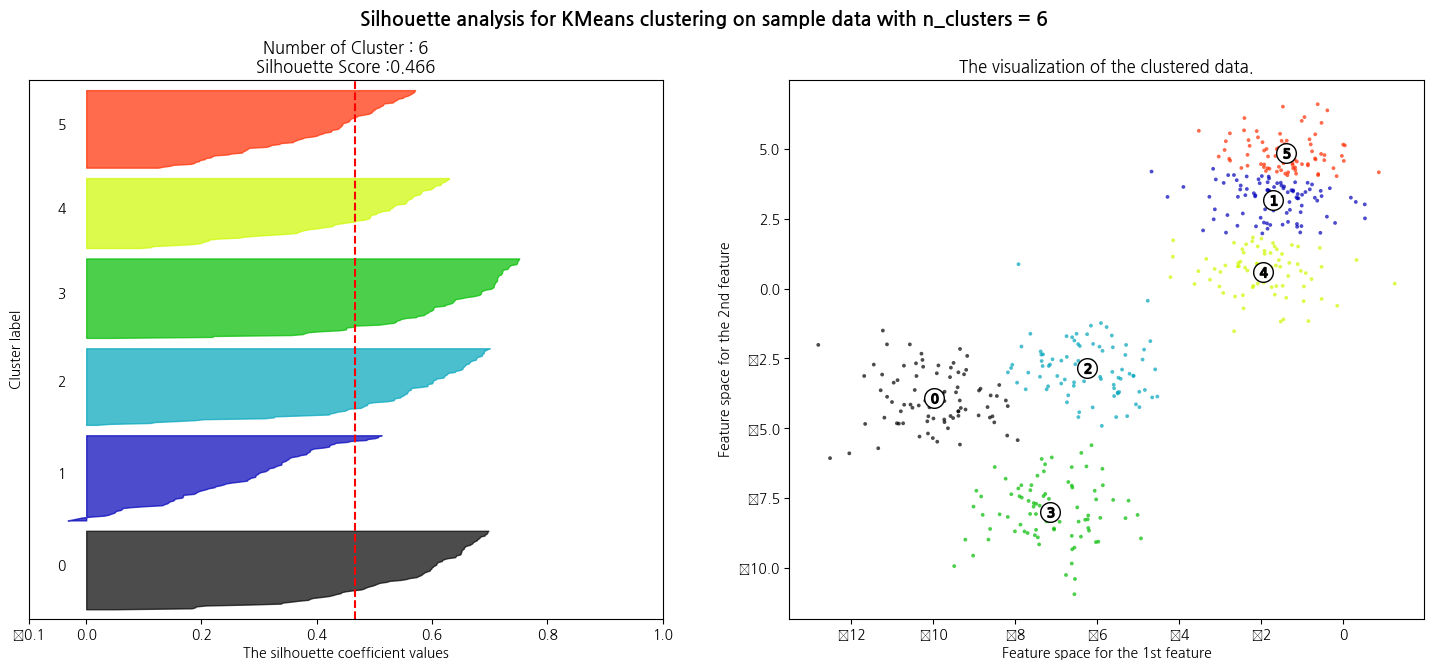

In [22]:
# 가상데이터: 피처 2개, 클러스터 6개
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=6, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# K-Means K: 6
visualize_silhouette_sklearn([6], X)


In [23]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

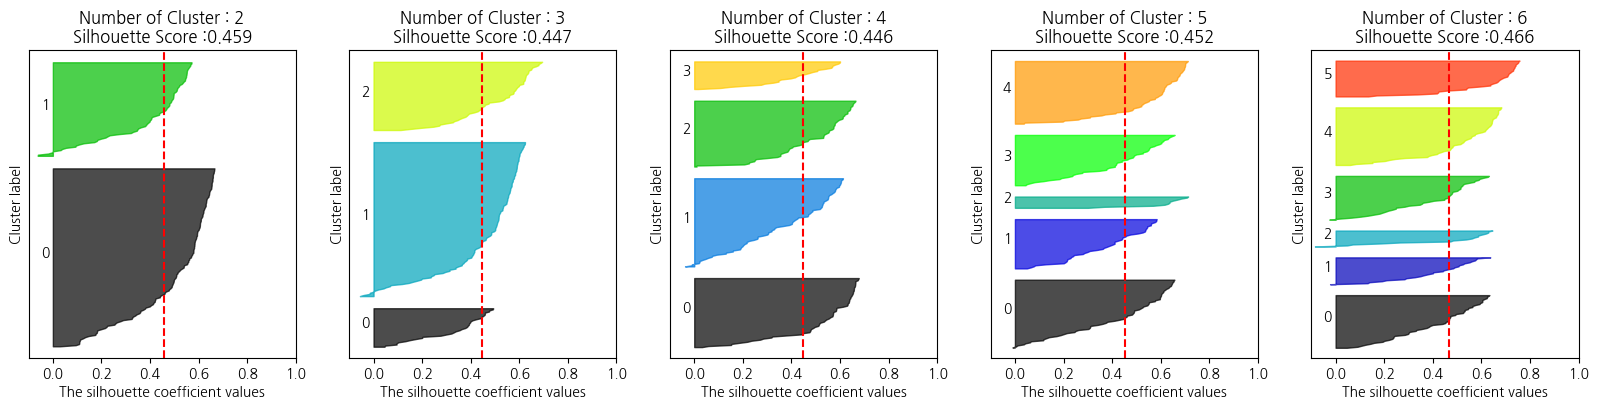

In [27]:
# iris 군집 개수 최적화
visualize_silhouette([ 2, 3, 4, 5 , 6], mMscaled_data)

In [25]:
mMscaled_data[mMscaled_data['cluster']==0]

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,신규실업수당청구,경기동행종합,산업생산지수,M2변화율,소매판매변화율,cluster,silhouette_coeff
DATE,,,,,,,,,,,,,,,,,,
2014-11-30,2.16,1.71,75.79,5.80,1001.00,-0.25,-0.66,-1.16,88.80,0.09,456721.00,291600.00,0.23,103.64,0.34,0.23,0,0.05
2014-12-31,2.13,1.50,59.29,5.60,1073.00,-0.20,-0.61,-1.13,93.60,0.12,475395.00,284500.00,0.45,103.63,0.69,-0.57,0,0.15
2015-03-31,1.91,1.38,47.82,5.40,960.00,1.46,-0.56,-1.05,93.00,0.11,489032.00,284000.00,0.28,101.82,0.07,1.52,0,0.08
2015-04-30,2.04,1.47,54.45,5.40,1190.00,1.88,-0.57,-1.02,95.90,0.12,456342.00,286000.00,0.32,101.24,0.35,0.20,0,0.20
2015-05-31,2.11,1.51,59.27,5.60,1079.00,1.88,-0.57,-1.00,90.70,0.12,450137.00,274000.00,0.26,100.78,0.24,0.77,0,0.43
2015-06-30,2.34,1.71,59.82,5.30,1205.00,1.60,-0.56,-0.99,96.10,0.13,495361.00,273750.00,0.40,100.48,0.37,0.08,0,0.24
2015-07-31,2.12,1.53,50.90,5.20,1146.00,1.05,-0.53,-0.98,93.10,0.13,449803.00,277750.00,0.35,101.11,0.41,0.81,0,0.37
2015-08-31,2.13,1.47,42.87,5.10,1130.00,0.44,-0.46,-0.97,91.90,0.14,451784.00,275200.00,0.26,100.94,0.42,0.00,0,0.41
2015-09-30,2.06,1.42,45.48,5.00,1224.00,0.11,-0.40,-0.96,87.20,0.14,462334.00,269500.00,0.31,100.65,0.49,-0.48,0,0.48


In [30]:
mMscaled_data['cluster'].value_counts()

0    59
3    55
5    44
1    37
4    28
2    17
Name: cluster, dtype: int64